In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
#loading dataset
df_wine=pd.read_csv('winequality-red.csv')
df_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [48]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**There is no null record found**

In [49]:
df_wine.shape

(1599, 12)

In [50]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**EDA**

In [51]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(8,5)
plt.rcParams['figure.facecolor']='FFFFCB'

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

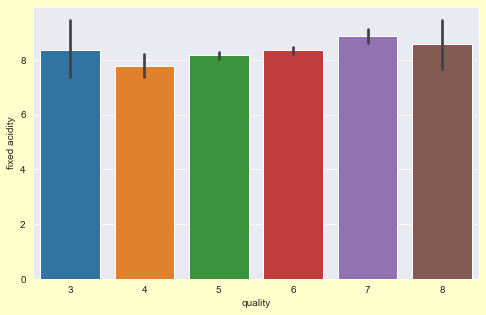

In [52]:
sns.barplot(x='quality' , y='fixed acidity' ,data=df_wine)

<function matplotlib.pyplot.show(close=None, block=None)>

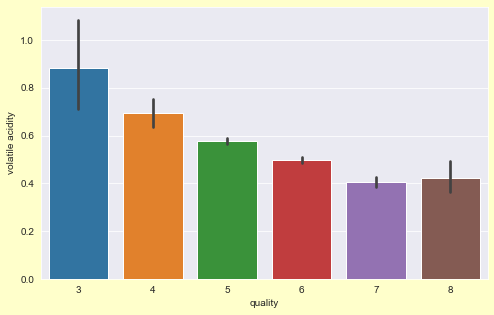

In [53]:
sns.barplot(x='quality',y='volatile acidity',data=df_wine)
plt.show

**we can see quality is increasing with decrease in volatile quality. there is "-ve correlation" relationship with some outliers**

<function matplotlib.pyplot.show(close=None, block=None)>

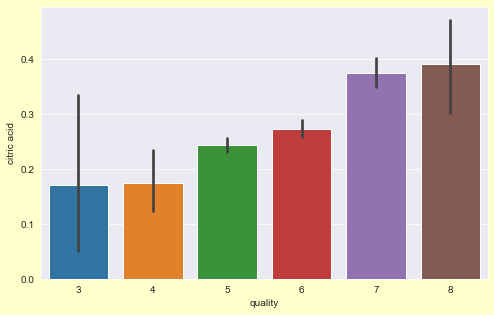

In [54]:
sns.barplot(x='quality',y='citric acid',data=df_wine)
plt.show

**In good quality wine citric content is more**

<function matplotlib.pyplot.show(close=None, block=None)>

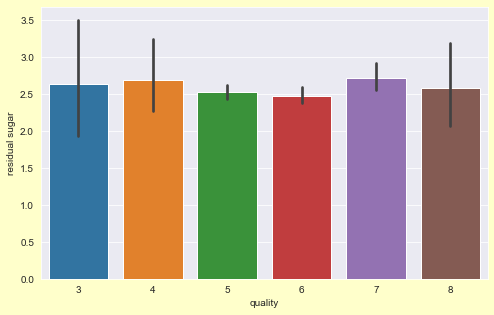

In [55]:
sns.barplot(x='quality',y='residual sugar',data=df_wine)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

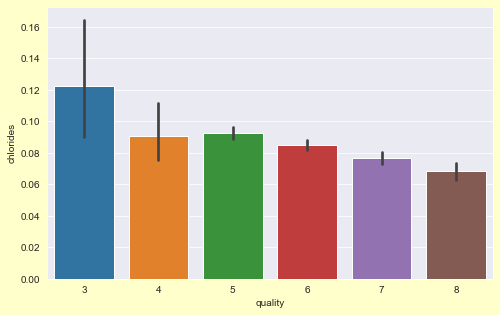

In [56]:
sns.barplot(x='quality',y='chlorides',data=df_wine)
plt.show

**In good quality wine chlorides content is less**

<function matplotlib.pyplot.show(close=None, block=None)>

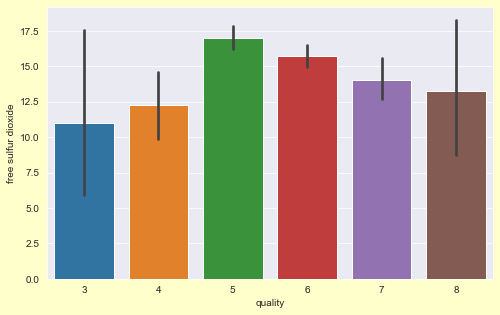

In [57]:
sns.barplot(x='quality',y='free sulfur dioxide',data=df_wine)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

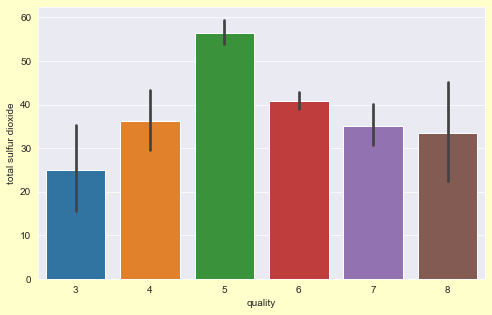

In [58]:
sns.barplot(x='quality',y='total sulfur dioxide',data=df_wine)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

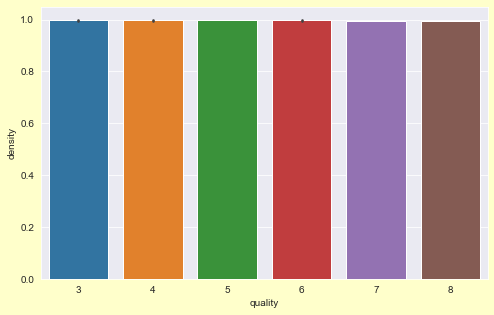

In [59]:
sns.barplot(x='quality',y='density',data=df_wine)
plt.show

**Density has very less impact on quality.**

<function matplotlib.pyplot.show(close=None, block=None)>

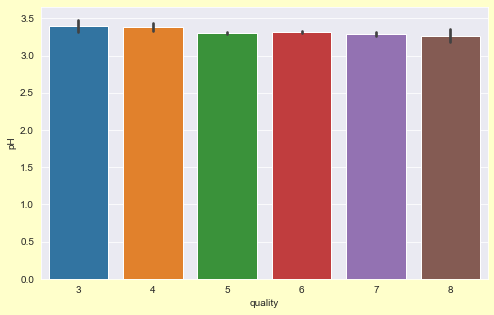

In [60]:
sns.barplot(x='quality',y='pH',data=df_wine)
plt.show

**ph range is between 3.3-3.4 ph is low for high quality wine**

<function matplotlib.pyplot.show(close=None, block=None)>

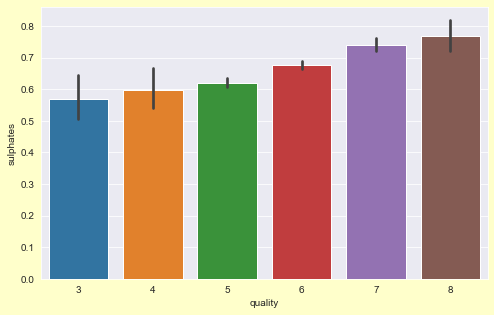

In [61]:
sns.barplot(x='quality',y='sulphates',data=df_wine)
plt.show

**Sulphate content is more in high quality wine. It increases with quality .+ve corelation**

<function matplotlib.pyplot.show(close=None, block=None)>

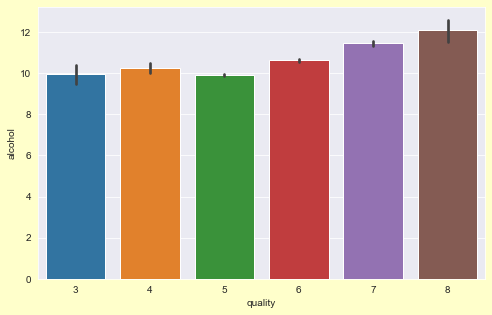

In [62]:
sns.barplot(x='quality',y='alcohol',data=df_wine)
plt.show

**Alcohol content in wine increases with Quality ,its +vely corelated**

In [63]:
# find out unique values
df_unique=df_wine['quality'].unique()
df_unique

array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot:>

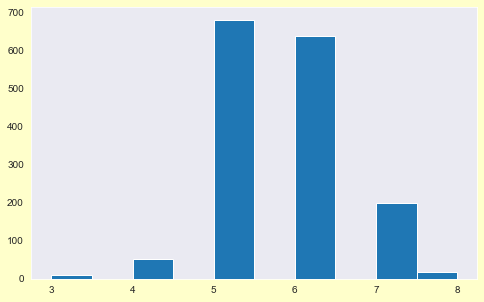

In [64]:
df_wine['quality'].hist(grid=False)

**we can see 5, 6 type quality wine data is more where as higher quality 7,8 is less**

In [65]:
# finding no. of count for each quality value
df_unique_count=df_wine['quality'].value_counts()
df_unique_count

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:ylabel='quality'>

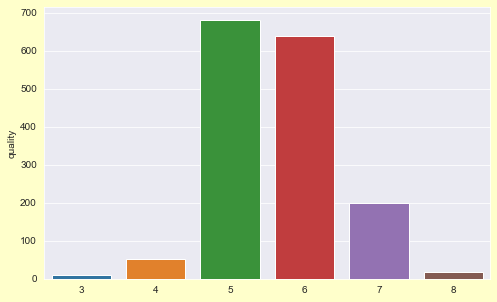

In [66]:
# df_unique vs df_unique_count
sns.barplot(x=df_unique ,y=df_unique_count ,data=df_wine)

**+ve correlated factors with quality as in descending order are 
Alcohol,sulphates,citric acid,fixed acidity,residual sugar
-ve correlation between
volatile acidity,total sulfur dioxide,density,chlorides,pH**

**feature selection**

In [67]:
x=df_wine.drop('quality',axis=1)
type(x)


pandas.core.frame.DataFrame

In [68]:
# corelation of each feature with quality(target) in descending order
df_wine.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Text(0.5, 1.0, 'Correlation with target')

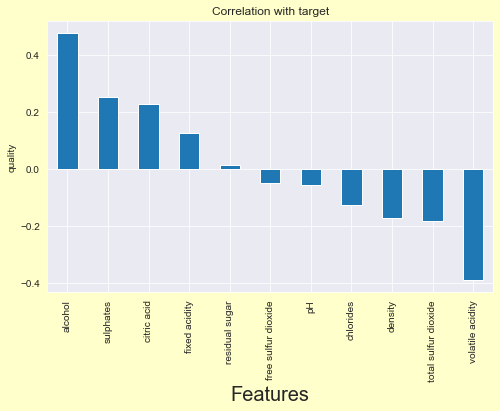

In [69]:
df_wine.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar')
plt.xlabel('Features',fontsize=20)
plt.ylabel('quality')
plt.title('Correlation with target')

**Transforming Data to remove skewness**

In [70]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

After considering acceptable range  of skewness is -/+0.5 .we can see skewness in residual sugar ,chlorides  ,free sulfur dioxide,total sulfur dioxid, sulphates is not acceptable .

In [71]:
## lets remove skewness (outlier removal) by using power_transform

from sklearn.preprocessing import power_transform
x_new =power_transform(x ,method='yeo-johnson')
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x=pd.DataFrame(x_new ,columns=cols)
# checking skewness after transforming data
x.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

from the above output we can see there is no skewness present in data

In [72]:
# converting catagorical data (3,4,5,6,7,8) into 2 catagories Good(1 >=7) / bad(0 )
q=[]
for i in df_wine['quality']:
    if(i>=7):
        q.append('1')
    else:
        q.append('0')
df_wine['quality']=q
y=df_wine['quality']

<AxesSubplot:>

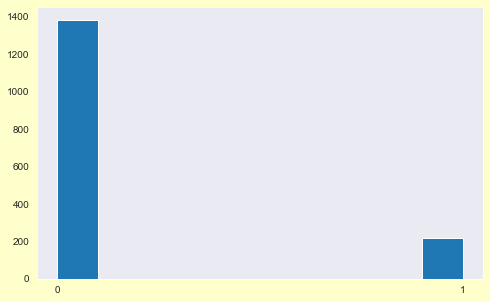

In [73]:

y.hist(grid=False)

we can see form above graph that this is example of imbalance dataset

**Data Scaling**

In [112]:
## Transforming data in same form
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568965e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
        -7.09517433e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054073e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         7.18868617e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         1.63859528e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831617e-01,  2.56369273e-01,  7.34557526e-01]])

In [75]:
#separate dataset into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=3)
x_train.shape ,x_test.shape

((1279, 11), (320, 11))

**Finding Multicollinearity**

In [76]:
## correlation metrics
df_wine.corr() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


<AxesSubplot:>

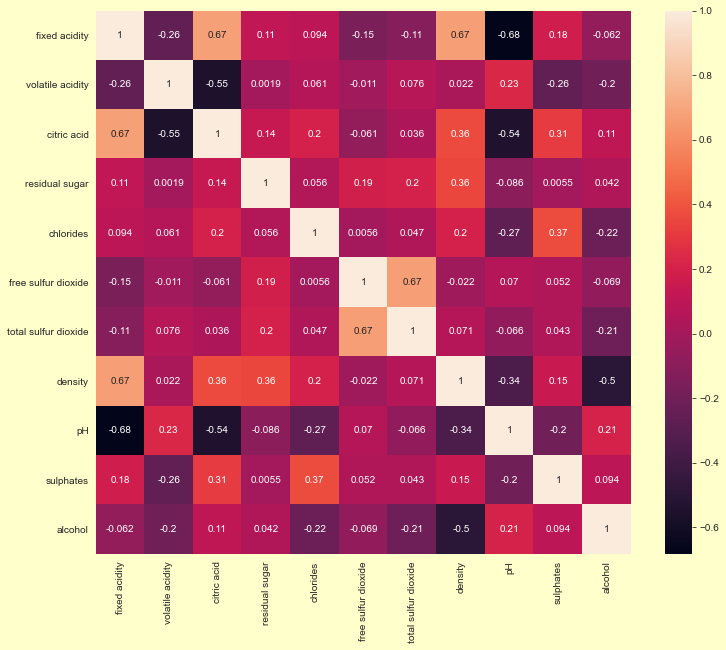

In [77]:
# using pearson correlation
plt.figure(figsize=(12,10))
cor=df_wine.corr()
sns.heatmap(cor ,annot=True )

In [78]:
# function to select for highly correlated features. 
#will remove first feature which is highly correlared with any other feature

def correlation(dataset , threshold):
    col_corr =set() # set of all names of correlated features we have taken st from preventing duplicate entries of columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # here will not use abs() function
            if(corr_matrix.iloc[i,j]> threshold):
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [83]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x_cor=pd.DataFrame(x ,columns=cols)

cor_features=correlation(x_cor ,0.66)
len(cor_features)

2

In [84]:
cor_features

{'density', 'total sulfur dioxide'}

**Dealing Multicollinearity**

In [ ]:
x.columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif=[]

for i in range(len(x.columns)):
    vif.append(variance_inflation_factor(x.values ,i))
vif_data["VIF"]=vif    
    
print(vif_data)


**so will drop the features which have VIF>5 ,here we can see fixed acidity  6.498474 and density  5.968698 will drop them**

In [ ]:
x_new=x.drop(['density' ,'fixed acidity'],axis=1)



In [86]:
x=pd.DataFrame(x_new , columns=cols )
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


**Outliers finding and data cleaning**

<AxesSubplot:>

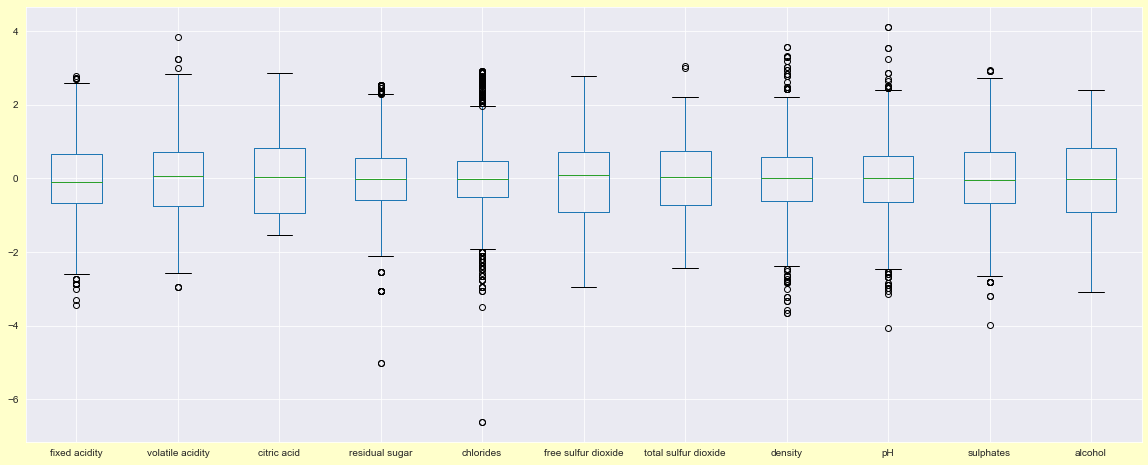

In [87]:
x.boxplot(figsize=(20,8))

**IQR Zscore method to deal with Outliers**

In [88]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(1599, 11)

In [96]:
threshold=3
#print index no
print("Indexes at which Outliers are present.")
print(np.where(z>3))


Indexes at which Outliers are present.
(array([   7,   45,   45,   95,   95,  126,  127,  151,  170,  198,  354,
        442,  469,  480,  517,  544,  544,  554,  555,  557,  608,  614,
        695,  695,  797,  836,  836,  837,  837,  889,  909,  914, 1017,
       1017, 1018, 1018, 1081, 1114, 1269, 1270, 1287, 1299, 1316, 1316,
       1321, 1321, 1369, 1374, 1434, 1435, 1571], dtype=int64), array([ 3,  0,  8,  0,  8,  1,  1,  8,  9,  3,  7,  7,  3,  7, 10,  8, 10,
        7,  7,  7,  7,  8,  4,  8,  4,  4,  7,  4,  7,  7,  3,  3,  3,  7,
        3,  7,  6,  7,  7,  7,  9,  1,  3,  8,  3,  8,  9,  3,  7,  7,  4],
      dtype=int64))


In [97]:
len(np.where(z>3)[0])

51

In [106]:
loss =100-data preserved
loss =100-(1599-51)/1599*100
loss

3.1894934333958673

since data loss is very less will drop the outliers

In [110]:
x_new=x.drop([   7,   45,   45,   95,   95,  126,  127,  151,  170,  198,  354,
        442,  469,  480,  517,  544,  544,  554,  555,  557,  608,  614,
        695,  695,  797,  836,  836,  837,  837,  889,  909,  914, 1017,
       1017, 1018, 1018, 1081, 1114, 1269, 1270, 1287, 1299, 1316, 1316,
       1321, 1321, 1369, 1374, 1434, 1435, 1571],axis=0)

In [111]:
x_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


#### Since the 'quality' variable has only 2 variables we will use binary classification algorithm

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
lr=LogisticRegression()


**will try to find out best value Random State** 

In [121]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100 ,1)== round(accuracy_score(y_test,pred_test)*100 ,1):
        print("At random state ",i,"model performs very well")
        print("Random state value is :",i)
        print("Training accuracy score is :",round(accuracy_score(y_train,pred_train)*100 ,1))
        print("Testing accuracy score is :", round(accuracy_score(y_test,pred_test)*100 ,1),'\n\n')
        

At random state  96 model performs very well
Random state value is : 96
Training accuracy score is : 88.4
Testing accuracy score is : 88.4 


At random state  97 model performs very well
Random state value is : 97
Training accuracy score is : 88.4
Testing accuracy score is : 88.4 


At random state  99 model performs very well
Random state value is : 99
Training accuracy score is : 88.4
Testing accuracy score is : 88.4 


At random state  134 model performs very well
Random state value is : 134
Training accuracy score is : 88.4
Testing accuracy score is : 88.4 


At random state  188 model performs very well
Random state value is : 188
Training accuracy score is : 88.4
Testing accuracy score is : 88.4 


At random state  231 model performs very well
Random state value is : 231
Training accuracy score is : 88.4
Testing accuracy score is : 88.4 


At random state  239 model performs very well
Random state value is : 239
Training accuracy score is : 88.1
Testing accuracy score is : 88.1 


#### will consider Random state = 96

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=96)
    

In [128]:
from sklearn.metrics import classification_report
print("Classification report :\n")
print(classification_report(y_test,pred_test))

Classification report :

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       280
           1       0.10      0.05      0.07        40

    accuracy                           0.82       320
   macro avg       0.48      0.49      0.48       320
weighted avg       0.78      0.82      0.80       320



#### convert imbalanced dataset into balanced dataset by using SMOT

#### Cross validation report for logistic regression

In [145]:
from sklearn.model_selection import cross_val_score

pred_lr=lr.predict(x_test)
lr_accu_score = accuracy_score(y_test,pred_lr)
for j in range(2,12):
    lr_crosval_score = cross_val_score(lr,x,y,cv=j)
    lr_crosval_score_mean = lr_crosval_score.mean() 
    print("At Cv:" ,j)
    print("Cross validation score is :",round(lr_crosval_score_mean*100,2))
    
    print("Accuracy score is :" ,round(lr_accu_score*100,2) ,'\n')

At Cv: 2
Cross validation score is : 86.05
Accuracy score is : 87.81 

At Cv: 3
Cross validation score is : 86.62
Accuracy score is : 87.81 

At Cv: 4
Cross validation score is : 87.56
Accuracy score is : 87.81 

At Cv: 5
Cross validation score is : 86.99
Accuracy score is : 87.81 

At Cv: 6
Cross validation score is : 87.55
Accuracy score is : 87.81 

At Cv: 7
Cross validation score is : 87.12
Accuracy score is : 87.81 

At Cv: 8
Cross validation score is : 87.24
Accuracy score is : 87.81 

At Cv: 9
Cross validation score is : 87.55
Accuracy score is : 87.81 

At Cv: 10
Cross validation score is : 87.87
Accuracy score is : 87.81 

At Cv: 11
Cross validation score is : 87.12
Accuracy score is : 87.81 



In [146]:
cross_val_score=cross_val_score(lr,x,y,cv=9).mean()
print("Cross validation score is :",round(cross_val_score*100,2))

Cross validation score is : 87.55


#### Random Forest Classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [159]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy score is :",round(accuracy_score(y_test,predrf)*100 ,2))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score is : 90.62
[[272   8]
 [ 22  18]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       280
           1       0.69      0.45      0.55        40

    accuracy                           0.91       320
   macro avg       0.81      0.71      0.75       320
weighted avg       0.90      0.91      0.90       320



In [152]:
from sklearn.svm import SVC

In [153]:
sv = SVC()
sv.fit(x_train,y_train)
predrf=sv.predict(x_test)
print("Accuracy score is :",round(accuracy_score(y_test,predrf)*100 ,2))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score is : 88.12
[[273   7]
 [ 31   9]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       280
           1       0.56      0.23      0.32        40

    accuracy                           0.88       320
   macro avg       0.73      0.60      0.63       320
weighted avg       0.86      0.88      0.86       320



In [176]:
from sklearn.model_selection import cross_val_score
cv_sv = cross_val_score(sv , x,y,cv=9)
print("cross val score for SVC :" ,cv_sv.mean(),"accuracy score is :" ,88.12)

cross val score for SVC : 0.8767889008795504 accuracy score is : 88.12


In [175]:
cv_rf = cross_val_score(rf , x,y,cv=9)
print("cross val score for Random forest :" ,cv_rf.mean(),"accuracy score is :" ,90.62)

cross val score for Random forest : 0.87493034836398 accuracy score is : 90.62


In [174]:
cv_lr = cross_val_score(lr , x,y,cv=9)
print("cross val score for logistic regression :" ,cv_lr.mean(),"accuracy score is :" ,88.4)

cross val score for logistic regression : 0.8755439880939787 accuracy score is : 88.4


After compairing Cross validation score , confusion matrix and accuracy score 
Random forest is performing well amongst all.we will continue with Random forest algorithm.

#### Hyper parameter tuning

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
#creating parameter list to pass to GridSearchCV
parameters={'max_features':['auto','sqrt','log'],
            'max_depth':[5,6,7,8,9],
             'criterion':['ginni','entropy']}

In [183]:

GS_CV= GridSearchCV(RandomForestClassifier(),parameters ,cv=5, scoring='accuracy')
GS_CV.fit(x_train,y_train)
GS_CV.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto'}

In [184]:
#prediction with best parameter
gride_pred=GS_CV.best_estimator_.predict(x_test) 
# best score 
accuracy_score(y_test,gride_pred)

0.915625

#### ROC AUC plot

Text(0.5, 1.0, 'ROC AUC PLOT')

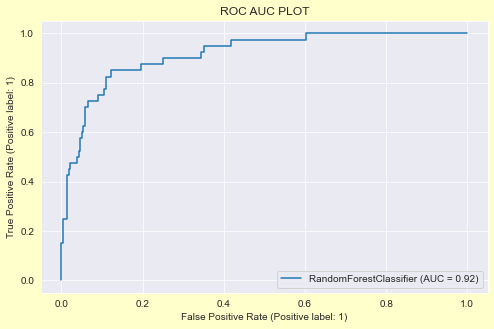

In [186]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GS_CV.best_estimator_,x_test , y_test)
plt.title("ROC AUC PLOT")

AUC =0.92 and accuracy = 0.912 which is very good

#### Saving model in pickel format

In [189]:
import joblib
joblib.dump(GS_CV.best_estimator_,"Red_wine_quality.pkl")

['Red_wine_quality.pkl']